In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import pickle
import timeit
import h5py
import os
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jakek/Documents/Computer Science/Semester 3/Data/Bus data/145/145 by direction new/145_direction0.csv', low_memory= False)

In [3]:
df.shape

(1177555, 16)

In [4]:
df.head()

,Unnamed: 0,Timestamp,LineID,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
0,40,1352246400000000,145.0,0,1450001,2012-11-06,6628,D1,0,-6.188775,53.280052,0,145003,33539,4636,0
1,58,1352246404000000,145.0,0,1450001,2012-11-06,6691,D2,0,-6.113439,53.198807,-352,145012,36026,4171,0
2,102,1352246404000000,145.0,0,1450001,2012-11-06,938813,D1,0,-6.114135,53.198540,-1265,145070,33468,4172,0
3,212,1352246424000000,145.0,0,1450001,2012-11-06,6691,D2,0,-6.114442,53.198460,-352,145012,36026,4172,0
4,234,1352246424000000,145.0,0,1450001,2012-11-06,938813,D1,0,-6.116844,53.196686,-1283,145070,33468,4172,0


In [5]:
df.dtypes

Unnamed: 0            int64
Timestamp             int64
LineID              float64
Direction             int64
JourneyPatternID      int64
TimeFrame            object
VehicleJourneyID      int64
Operator             object
Congestion            int64
Lon                 float64
Lat                 float64
Delay                 int64
BlockID               int64
VehicleID             int64
StopID               object
AtStop                int64
dtype: object

In [6]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

In [7]:
df.dtypes

Unnamed: 0             int64
Timestamp              int64
LineID               float64
Direction              int64
JourneyPatternID       int64
TimeFrame           category
VehicleJourneyID       int64
Operator            category
Congestion             int64
Lon                  float64
Lat                  float64
Delay                  int64
BlockID                int64
VehicleID              int64
StopID              category
AtStop                 int64
dtype: object

In [8]:
print(numeric_columns, object_columns)

Index(['Unnamed: 0', 'Timestamp', 'LineID', 'Direction', 'JourneyPatternID',
       'VehicleJourneyID', 'Congestion', 'Lon', 'Lat', 'Delay', 'BlockID',
       'VehicleID', 'AtStop'],
      dtype='object') Index(['TimeFrame', 'Operator', 'StopID'], dtype='object')


In [9]:
for column in numeric_columns:
    print(column + "," + str(len(df[column].unique())))

Unnamed: 0,932748
Timestamp,643422
LineID,1
Direction,1
JourneyPatternID,5
VehicleJourneyID,1516
Congestion,2
Lon,38665
Lat,36593
Delay,5287
BlockID,46
VehicleID,207
AtStop,2


In [10]:
df.JourneyPatternID.unique()

array([1450001, 1450004, 1450005, 1450002, 1450003], dtype=int64)

In [11]:
new_object = ['Congestion', 'AtStop']
for i in new_object:
    df[i] = df[i].astype('category')
categorical_columns = df.select_dtypes(['category']).columns

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1177555.0,8.859283e+05,4.963514e+05,1.000000e+00,4.612060e+05,8.799350e+05,1.315352e+06,1.782231e+06
Timestamp,1177555.0,1.355941e+15,2.626677e+12,1.352160e+15,1.353341e+15,1.357226e+15,1.358370e+15,1.359590e+15
LineID,1177555.0,1.450000e+02,0.000000e+00,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
Direction,1177555.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
JourneyPatternID,1177555.0,1.450001e+06,5.582477e-01,1.450001e+06,1.450001e+06,1.450001e+06,1.450001e+06,1.450005e+06
VehicleJourneyID,1177555.0,1.091166e+04,5.715554e+04,5.507000e+03,6.261000e+03,6.449000e+03,6.733000e+03,9.933810e+05
Lon,1177555.0,-6.190537e+00,6.193595e-02,-6.387283e+00,-6.255168e+00,-6.191483e+00,-6.129216e+00,-6.059200e+00
Lat,1177555.0,5.327242e+01,6.261298e-02,5.307620e+01,5.320646e+01,5.328111e+01,5.333546e+01,5.351527e+01
Delay,1177555.0,-1.927343e+02,5.455325e+02,-6.198000e+03,-4.580000e+02,-1.390000e+02,2.500000e+01,1.984400e+04
BlockID,1177555.0,1.851879e+05,1.598438e+05,1.459900e+04,1.450070e+05,1.450140e+05,1.451070e+05,8.213820e+05


In [13]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
TimeFrame,1177555,56,2012-11-08,27747
Operator,1177555,6,D1,848919
Congestion,1177555,2,0,1172897
StopID,1177555,111,4320,88029
AtStop,1177555,2,0,863670


In [14]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(1177555, 16)
(1177555, 16)


In [15]:
df.select_dtypes(['category']).describe().T.unique ==1


TimeFrame     False
Operator      False
Congestion    False
StopID        False
AtStop        False
Name: unique, dtype: bool

In [16]:
df.max() == df.min()

Unnamed: 0          False
Timestamp           False
LineID               True
Direction            True
JourneyPatternID    False
TimeFrame           False
VehicleJourneyID    False
Operator            False
Congestion          False
Lon                 False
Lat                 False
Delay               False
BlockID             False
VehicleID           False
StopID              False
AtStop              False
dtype: bool

In [17]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
df.shape

(1177555, 14)

In [18]:
#continuous
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1177555.0,8.859283e+05,4.963514e+05,1.000000e+00,4.612060e+05,8.799350e+05,1.315352e+06,1.782231e+06
Timestamp,1177555.0,1.355941e+15,2.626677e+12,1.352160e+15,1.353341e+15,1.357226e+15,1.358370e+15,1.359590e+15
JourneyPatternID,1177555.0,1.450001e+06,5.582477e-01,1.450001e+06,1.450001e+06,1.450001e+06,1.450001e+06,1.450005e+06
VehicleJourneyID,1177555.0,1.091166e+04,5.715554e+04,5.507000e+03,6.261000e+03,6.449000e+03,6.733000e+03,9.933810e+05
Lon,1177555.0,-6.190537e+00,6.193595e-02,-6.387283e+00,-6.255168e+00,-6.191483e+00,-6.129216e+00,-6.059200e+00
Lat,1177555.0,5.327242e+01,6.261298e-02,5.307620e+01,5.320646e+01,5.328111e+01,5.333546e+01,5.351527e+01
Delay,1177555.0,-1.927343e+02,5.455325e+02,-6.198000e+03,-4.580000e+02,-1.390000e+02,2.500000e+01,1.984400e+04
BlockID,1177555.0,1.851879e+05,1.598438e+05,1.459900e+04,1.450070e+05,1.450140e+05,1.451070e+05,8.213820e+05
VehicleID,1177555.0,3.644634e+04,1.912714e+03,3.306900e+04,3.600200e+04,3.802300e+04,3.803600e+04,4.302100e+04


In [19]:
#categorical
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
TimeFrame,1177555,56,2012-11-08,27747
Operator,1177555,6,D1,848919
Congestion,1177555,2,0,1172897
StopID,1177555,111,4320,88029
AtStop,1177555,2,0,863670


In [20]:
df.head()

,Unnamed: 0,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
0,40,1352246400000000,1450001,2012-11-06,6628,D1,0,-6.188775,53.280052,0,145003,33539,4636,0
1,58,1352246404000000,1450001,2012-11-06,6691,D2,0,-6.113439,53.198807,-352,145012,36026,4171,0
2,102,1352246404000000,1450001,2012-11-06,938813,D1,0,-6.114135,53.198540,-1265,145070,33468,4172,0
3,212,1352246424000000,1450001,2012-11-06,6691,D2,0,-6.114442,53.198460,-352,145012,36026,4172,0
4,234,1352246424000000,1450001,2012-11-06,938813,D1,0,-6.116844,53.196686,-1283,145070,33468,4172,0


In [21]:
id_columns = ['Unnamed: 0','Timestamp', 'TimeFrame', 'VehicleJourneyID', 'JourneyPatternID', 'Lon', 'Lat', 'BlockID', 'VehicleID', 'StopID'] 

In [22]:
for feature in df:
    if feature not in id_columns:
        print(feature, df[feature].unique())
        print('\n')

Operator [D1, D2, CD, PO, SL, CF]
Categories (6, object): [D1, D2, CD, PO, SL, CF]


Congestion [0, 1]
Categories (2, int64): [0, 1]


Delay [    0  -352 -1265 ...,  2542 -3858  2653]


AtStop [0, 1]
Categories (2, int64): [0, 1]




In [23]:
categ = ['Operator', 'Congestion', 'AtStop']
contin = ['Delay']

In [24]:
for i in id_columns:
    df[i] = df[i].astype('category')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029521D6B978>]], dtype=object)

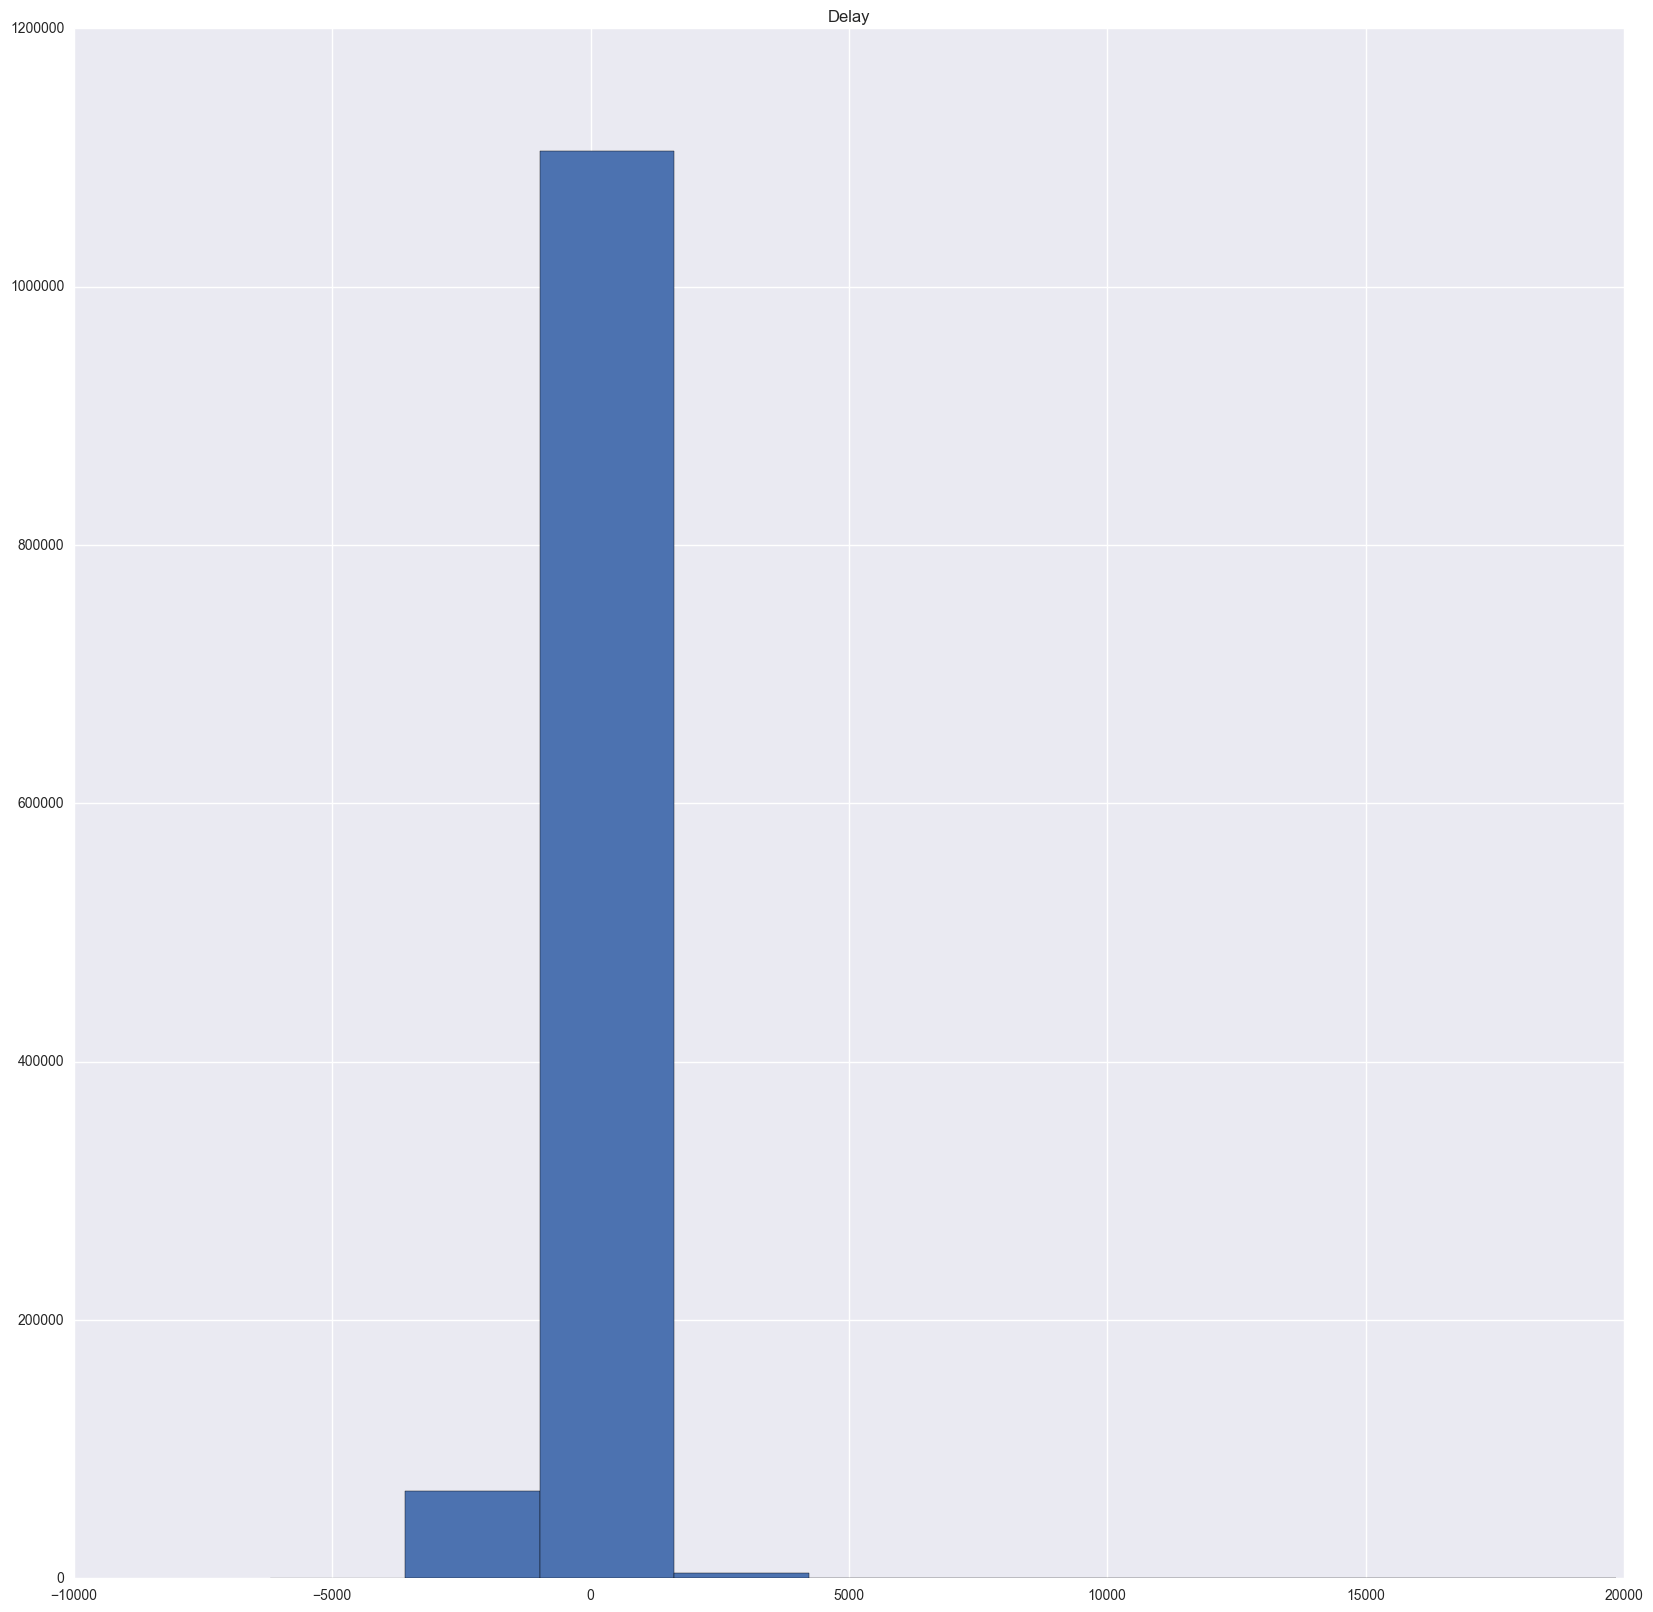

In [25]:
plt.figure()
df[contin].hist(figsize=(20, 20))

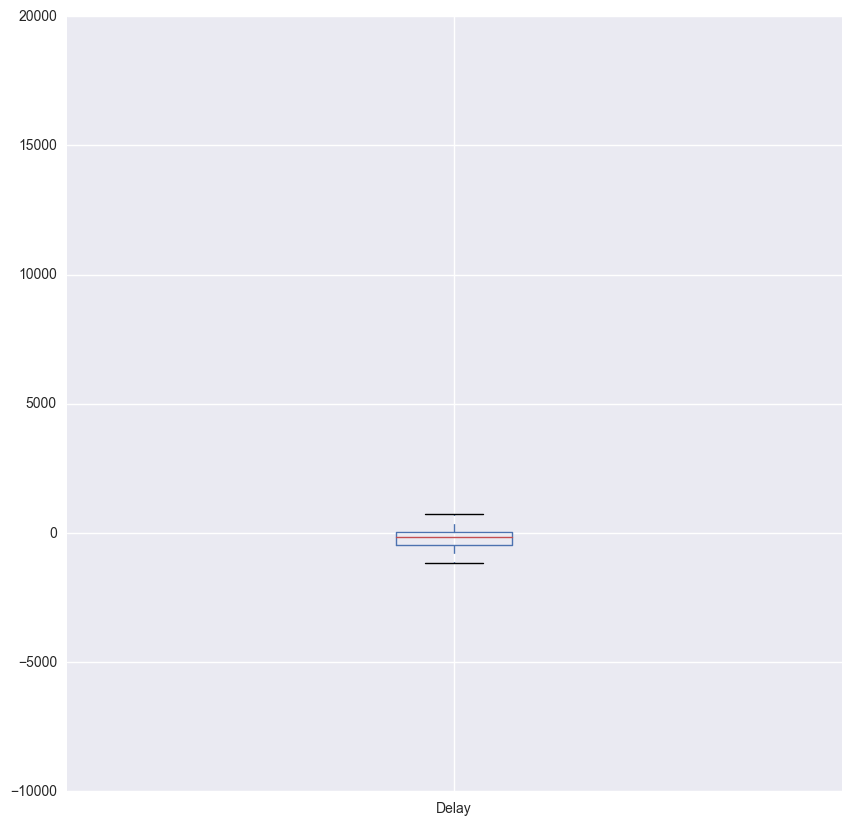

In [26]:
for i in contin:
    j=df[i].plot(kind='box', figsize=(10,10))
    plt.show()

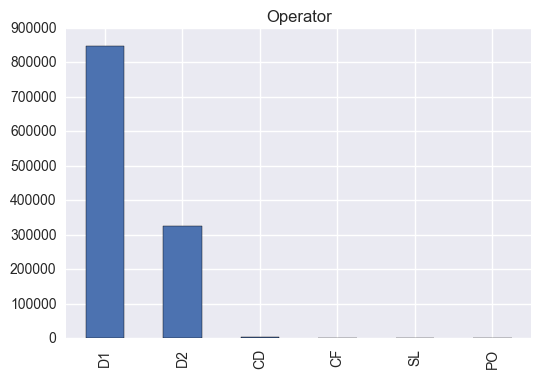

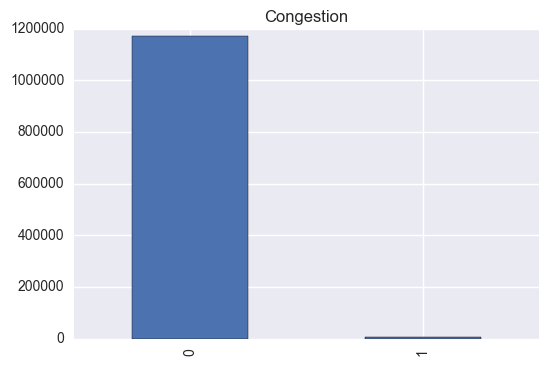

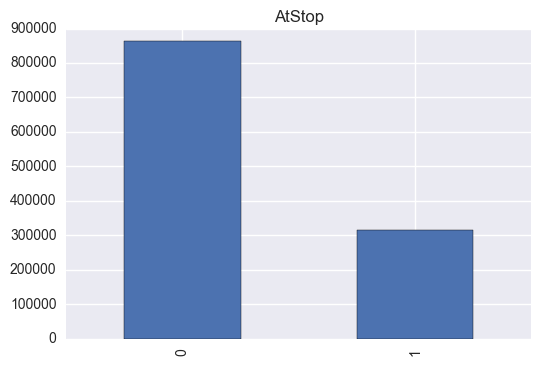

In [27]:
for i in categ:
    j=df[i].value_counts().plot(kind='bar', title=i)
    plt.show()

In [28]:
#check cardinality
for i in categ:
    print(i, pd.unique(df[i].ravel()))

Operator ['D1' 'D2' 'CD' 'PO' 'SL' 'CF']
Congestion [0 1]
AtStop [0 1]


In [29]:
#check null values
df.isnull().sum()

Unnamed: 0          0
Timestamp           0
JourneyPatternID    0
TimeFrame           0
VehicleJourneyID    0
Operator            0
Congestion          0
Lon                 0
Lat                 0
Delay               0
BlockID             0
VehicleID           0
StopID              0
AtStop              0
dtype: int64

In [30]:
df.sort_values(by ='Unnamed: 0').head(15)

,Unnamed: 0,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
550657,1,1357084809000000,1450001,2013-01-01,16448,D1,0,-6.124031,53.230515,-828,145002,38036,3138,0
550658,2,1357084809000000,1450001,2013-01-01,16418,D1,0,-6.185500,53.278549,-1574,145103,38028,5092,0
550659,5,1357084830000000,1450001,2013-01-01,16448,D1,0,-6.124220,53.228706,-828,145002,38036,3139,0
550660,6,1357084830000000,1450001,2013-01-01,16418,D1,0,-6.190000,53.280418,-1574,145103,38028,5092,0
550661,8,1357084848000000,1450001,2013-01-01,16448,D1,0,-6.125038,53.226059,-863,145002,38036,4124,0
130079,9,1352678402000000,1450001,2012-11-11,16801,D1,0,-6.130641,53.242863,-539,145002,38097,3135,1
550662,9,1357084850000000,1450001,2013-01-01,16418,D1,0,-6.193700,53.282566,-1574,145103,38028,5092,0
550663,11,1357084868000000,1450001,2013-01-01,16418,D1,0,-6.194867,53.285732,-1574,145103,38028,5092,0
106188,12,1352505604000000,1450001,2012-11-09,6691,D1,0,-6.121009,53.195908,-465,145012,38090,4173,0
550664,12,1357084868000000,1450001,2013-01-01,16448,D1,0,-6.123896,53.223560,-888,145002,38036,4124,0


In [31]:
"""we can see from the above dataframe that the duplicates of the first column (the column that shows the row number of the cell 
in the origional document) is useless as there are duplicates from different source files. therefore we will drop it"""
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
0,1352246400000000,1450001,2012-11-06,6628,D1,0,-6.188775,53.280052,0,145003,33539,4636,0
1,1352246404000000,1450001,2012-11-06,6691,D2,0,-6.113439,53.198807,-352,145012,36026,4171,0
2,1352246404000000,1450001,2012-11-06,938813,D1,0,-6.114135,53.198540,-1265,145070,33468,4172,0
3,1352246424000000,1450001,2012-11-06,6691,D2,0,-6.114442,53.198460,-352,145012,36026,4172,0
4,1352246424000000,1450001,2012-11-06,938813,D1,0,-6.116844,53.196686,-1283,145070,33468,4172,0


In [32]:
# outliers are not something that seem to be a hufe issues here..

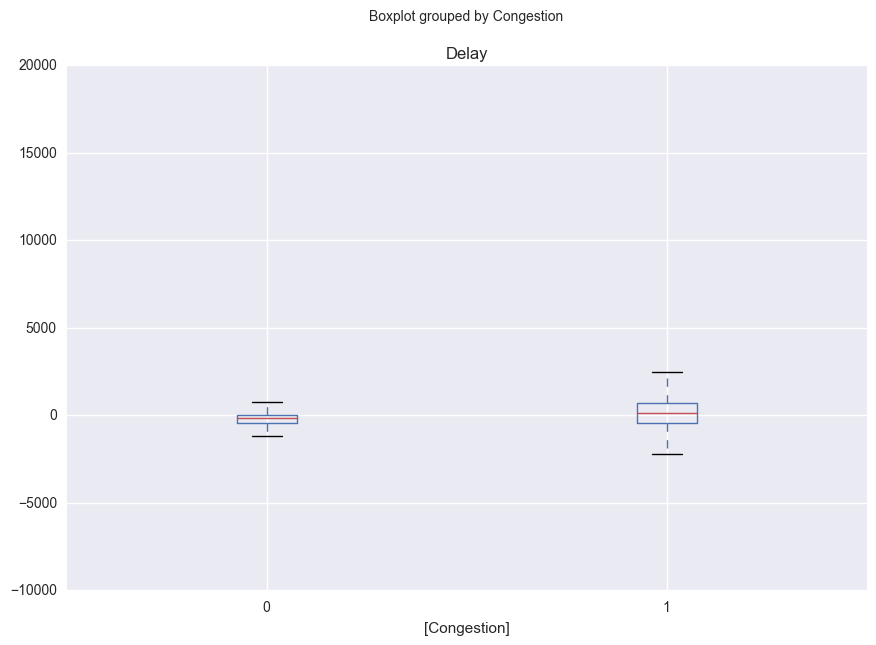

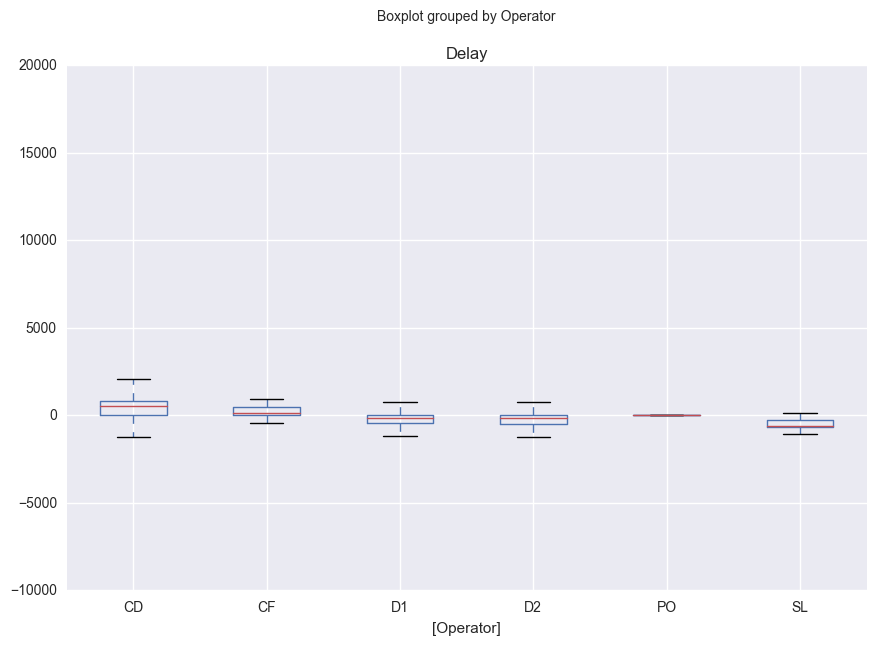

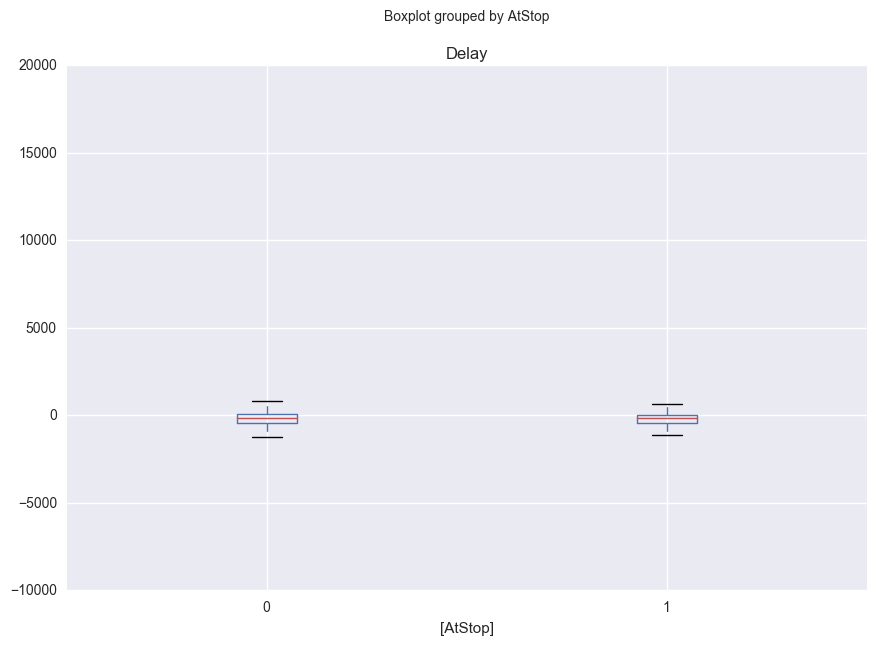

In [33]:
# plt.figure()
# for cat in categ:
#     for con in contin:
#         bp = df.boxplot(column=[cat], by=[con], figsize=(10,7))

bp = df.boxplot(column=['Delay'], by=['Congestion'], figsize=(10,7))
bp = df.boxplot(column=['Delay'], by=['Operator'], figsize=(10,7))
bp = df.boxplot(column=['Delay'], by=['AtStop'], figsize=(10,7))

In [34]:
#correlations between the continuous features
df[contin].corr()

,Delay
Delay,1.0


In [35]:
df = df.sort_values(['StopID', 'VehicleJourneyID'])

In [36]:
df.head()

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
932989,1358536375000000,1450001,2013-01-18,6297,D2,0,-6.267517,53.346100,999,145101,36034,1445,0
280901,1353311593000000,1450001,2012-11-19,5941,D1,0,-6.284541,53.347012,33,145003,38027,1476,0
280909,1353311614000000,1450001,2012-11-19,5941,D1,0,-6.282137,53.346836,17,145003,38027,1476,0
280918,1353311634000000,1450001,2012-11-19,5941,D1,0,-6.280609,53.346676,17,145003,38027,1476,0
280924,1353311655000000,1450001,2012-11-19,5941,D1,0,-6.280563,53.346668,17,145003,38027,1476,0


In [37]:
df[['Timestamp','VehicleJourneyID','StopID','AtStop']].query('AtStop==1').head(10)

,Timestamp,VehicleJourneyID,StopID,AtStop
307822,1353397927000000,5941,1476,1
361251,1353570770000000,5941,1476,1
286661,1353323530000000,5943,1476,1
313937,1353409988000000,5943,1476,1
341247,1353496344000000,5943,1476,1
367465,1353582786000000,5943,1476,1
393397,1353669149000000,5943,1476,1
291295,1353334469000000,5945,1476,1
382940,1353616463000000,5949,1476,1
385688,1353626623000000,5951,1476,1


In [38]:
(df.groupby(['VehicleJourneyID','TimeFrame']).StopID.nunique() <15).sum()


3358

In [39]:
(df.groupby(['VehicleJourneyID','TimeFrame']).StopID.nunique() >15).sum()


4550

In [40]:
df_moving = df.groupby(['VehicleJourneyID','TimeFrame'])
# .filter(len(df['StopID'].unique()) <15))
df_moving = df_moving.filter(lambda x: (x.StopID).nunique() > 15)

In [41]:
df_moving.shape

(1161749, 13)

In [42]:
df.shape[0]-df_moving.shape[0]

15806

In [43]:
df_moving.head()

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
280901,1353311593000000,1450001,2012-11-19,5941,D1,0,-6.284541,53.347012,33,145003,38027,1476,0
280909,1353311614000000,1450001,2012-11-19,5941,D1,0,-6.282137,53.346836,17,145003,38027,1476,0
280918,1353311634000000,1450001,2012-11-19,5941,D1,0,-6.280609,53.346676,17,145003,38027,1476,0
280924,1353311655000000,1450001,2012-11-19,5941,D1,0,-6.280563,53.346668,17,145003,38027,1476,0
280931,1353311677000000,1450001,2012-11-19,5941,D1,0,-6.278986,53.346363,17,145003,38027,1476,0


In [44]:
karl = df_moving[df_moving['VehicleJourneyID'] == 5941]

In [45]:
karl = karl[karl['TimeFrame'] == "19/11/2012"]

In [46]:
karl.head()

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop


In [47]:
karl['TimeFrame'].nunique()

0

In [48]:
json_string = karl.to_json(orient='records')

In [50]:
json_string

'[{"Timestamp":1350000000000000.0,"JourneyPatternID":1450001,"TimeFrame":"19\\/11\\/2012","VehicleJourneyID":5941,"Operator":"D1","Congestion":0,"Lon":-6.284541,"Lat":53.347012,"Delay":33,"BlockID":145003,"VehicleID":38027,"StopID":"1476","AtStop":0},{"Timestamp":1350000000000000.0,"JourneyPatternID":1450001,"TimeFrame":"19\\/11\\/2012","VehicleJourneyID":5941,"Operator":"D1","Congestion":0,"Lon":-6.282137,"Lat":53.346836,"Delay":17,"BlockID":145003,"VehicleID":38027,"StopID":"1476","AtStop":0},{"Timestamp":1350000000000000.0,"JourneyPatternID":1450001,"TimeFrame":"19\\/11\\/2012","VehicleJourneyID":5941,"Operator":"D1","Congestion":0,"Lon":-6.280609,"Lat":53.346676,"Delay":17,"BlockID":145003,"VehicleID":38027,"StopID":"1476","AtStop":0},{"Timestamp":1350000000000000.0,"JourneyPatternID":1450001,"TimeFrame":"19\\/11\\/2012","VehicleJourneyID":5941,"Operator":"D1","Congestion":0,"Lon":-6.280563,"Lat":53.346668,"Delay":17,"BlockID":145003,"VehicleID":38027,"StopID":"1476","AtStop":0},{"

In [51]:
with open('karl.json', 'w') as f:
    f.write(json_string)
f.close()

In [52]:
karl.tail(10)

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
896033,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.254086,53.333458,-209,145003,38027,846,1
896041,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.253640,53.332874,-209,145003,38027,846,0
896049,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.253640,53.332874,-209,145003,38027,846,0
896057,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.253478,53.332722,-184,145003,38027,846,0
896067,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.252395,53.331520,-215,145003,38027,846,0
896073,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.252345,53.331463,-198,145003,38027,847,0
896080,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.250892,53.330635,-198,145003,38027,847,0
896088,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.249073,53.329670,-225,145003,38027,848,1
896096,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.248652,53.329449,-225,145003,38027,848,0
896105,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.246460,53.328430,-225,145003,38027,848,0


In [53]:
karl = karl.sort_values('Timestamp')
# karl['StopID'].unique()

In [54]:
#this is the 145 south, leave kilmacanogue
home = 

SyntaxError: invalid syntax (<ipython-input-54-9059b624ad46>, line 2)

In [55]:
df_moving.head()

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
895625,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.284541,53.347012,33,145003,38027,1476,0
895633,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.282137,53.346836,17,145003,38027,1476,0
895642,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.280609,53.346676,17,145003,38027,1476,0
895648,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.280563,53.346668,17,145003,38027,1476,0
895655,1.350000e+15,1450001,19/11/2012,5941,D1,0,-6.278986,53.346363,17,145003,38027,1476,0


In [79]:
df_moving.dtypes

Timestamp           category
JourneyPatternID    category
TimeFrame           category
VehicleJourneyID    category
Operator            category
Congestion          category
Lon                 category
Lat                 category
Delay                  int64
BlockID             category
VehicleID           category
StopID              category
AtStop              category
dtype: object

In [49]:
for i in df_moving['VehicleJourneyID'].unique():
    df_j = df_moving[df_moving['VehicleJourneyID'] == i]
    for j in df_j['TimeFrame'].unique():
        df_x = df_j[df_j['TimeFrame'] == j]
        if ([df_x['JourneyPatternID'] == 1450001] == False):
            print("ID:",i, "Timeframe:", j,"journeyPatternID is", df_x['JourneyPatternID'].unique(), "number of stops is:", df_x['StopID'].nunique() )
            print('\n')
            x+=1
print(x)

NameError: name 'x' is not defined

In [85]:
df_moving['JourneyPatternID'].unique()

[1450001, 1450004, 1450005, 1450002, 1450003]
Categories (5, int64): [1450001, 1450004, 1450005, 1450002, 1450003]

In [92]:
df_moving.loc[df_moving['JourneyPatternID'] == 1450005]

,Timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Operator,Congestion,Lon,Lat,Delay,BlockID,VehicleID,StopID,AtStop
924879,1.350000e+15,1450005,20/11/2012,6153,D1,0,-6.284403,53.347008,-37,821378,43021,1476,0
924891,1.350000e+15,1450005,20/11/2012,6153,D1,0,-6.281668,53.346786,-75,821378,43021,1476,0
924903,1.350000e+15,1450005,20/11/2012,6153,D1,0,-6.279074,53.346382,-99,821378,43021,1476,0
924911,1.350000e+15,1450005,20/11/2012,6153,D1,0,-6.276530,53.345921,-123,821378,43021,1476,0
924924,1.350000e+15,1450005,20/11/2012,6153,D1,0,-6.276024,53.345844,-123,821378,43021,1476,0
952026,1.350000e+15,1450005,21/11/2012,6153,D1,0,-6.281774,53.346798,225,821378,43003,1476,0
952038,1.350000e+15,1450005,21/11/2012,6153,D1,0,-6.278548,53.346279,190,821378,43003,1476,0
978444,1.350000e+15,1450005,22/11/2012,6153,D2,0,-6.282590,53.346886,-165,821378,33092,1476,0
978458,1.350000e+15,1450005,22/11/2012,6153,D2,0,-6.281000,53.346722,-165,821378,33092,1476,0
978471,1.350000e+15,1450005,22/11/2012,6153,D2,0,-6.280699,53.346687,-165,821378,33092,1476,0


In [50]:
df_moving.to_csv("145_0_not_static.csv")